In [2]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


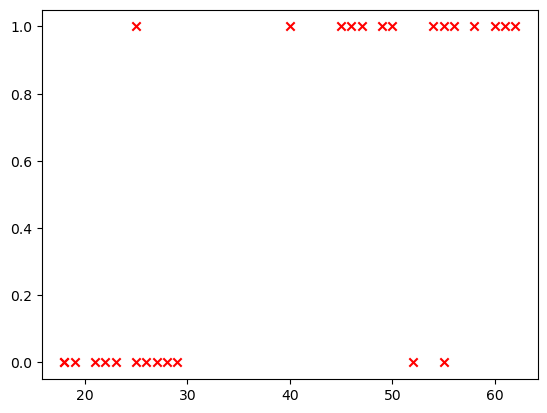

In [6]:
plt.scatter(df['age'], df['bought_insurance'], color="red", marker='x')

In [11]:
from sklearn.model_selection import train_test_split

In [39]:
X = df[['age']].values
X

array([[22],
       [25],
       [47],
       [52],
       [46],
       [56],
       [55],
       [60],
       [62],
       [61],
       [18],
       [28],
       [27],
       [29],
       [49],
       [55],
       [25],
       [58],
       [19],
       [18],
       [21],
       [26],
       [40],
       [45],
       [50],
       [54],
       [23]], dtype=int64)

In [43]:
y = df['bought_insurance'].values
y

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0], dtype=int64)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.9, random_state = 3)

In [48]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
model.score(X_test, y_test)

0.88

In [ ]:
# exercise

In [51]:
import pandas as pd

In [55]:
df = pd. read_csv("HR_file.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [62]:
#checking/count for null values

# checking
print(df['number_project'].isnull().values.any())
print(df.isnull().values.any())

#counting
print(df['number_project'].isnull().values.sum())
print(df.isnull().values.sum())

False
False
0
0


In [66]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [67]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [68]:
df.groupby('left').mean()

C:\Users\sri\AppData\Local\Temp\ipykernel_29228\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [70]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [72]:
# salary has dummy variable. 
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [81]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis = 1)
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [82]:
df_with_dummies.drop(['salary'], axis = "columns" , inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [83]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [84]:
y = df.left

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .3)

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [88]:
model.fit(X_train, y_train)

LogisticRegression()

In [89]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
model.score(X_test, y_test)

0.7728571428571429